# Trablho de Conclusão de Curso - UNIVESP - 1S/2025- Notebook 2

# Código: tcc530-sala-002grupo-002

### Análise Baseada no Trabalho Desenvolvido em: https://github.com/SarahSouzaPontes/analise_dados_dengue

## 1.0 Packges

### Packges Import

In [1]:
# Packages
import numpy                   as np
import pandas                  as pd
import matplotlib.pyplot       as plt
import seaborn                 as sns
import sys

### Packges Version Control

In [2]:
pip freeze --local > ../requeriments_not2.txt

Note: you may need to restart the kernel to use updated packages.


## 2.0 Data Read

In [3]:
link   = '../dados/dados_join.csv'
df = pd.read_csv(link,sep=",",low_memory=False)

In [4]:
link                  = '../dados/colnames.csv'
colnames_dengue_bahia = pd.read_csv(link,sep=",")

In [5]:
colnamesbahia = colnames_dengue_bahia['nomes'].values.tolist()

In [6]:
print('Colunas que não temos em nosso dataset!')
for column in colnamesbahia:
    if(column not in df.columns): 
        print(column)

Colunas que não temos em nosso dataset!
NU_NOTIFIC
ID_PESSOA
NOME
NOME DO MUNICÍPIO
POPULAÇÃO ESTIMADA 2020
POPULAÇÃO ESTIMADA 2019
POPULAÇÃO ESTIMADA 2018
POPULAÇÃO ESTIMADA 2017
POPULAÇÃO ESTIMADA 2016
POPULAÇÃO ESTIMADA 2015
POPULAÇÃO ESTIMADA 2014
POPULAÇÃO ESTIMADA 2013
POPULAÇÃO ESTIMADA 2012
POPULAÇÃO ESTIMADA 2011
MUN_HOSP
UF_HOSP
MUN_SAUDENOT
UF_SAUDENOT
MUNI_RESI
UF_RESI
MUN_INFEC
UF_INFEC
IDADE
SEM_PRI_V


In [7]:
df_new = pd.DataFrame()

In [8]:
for column in colnamesbahia:

    if(column in df.columns): 
        
        df_new[column] = df[column].copy()

/tmp/ipykernel_181663/301521693.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[column] = df[column].copy()
/tmp/ipykernel_181663/301521693.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[column] = df[column].copy()
/tmp/ipykernel_181663/301521693.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

## 3.0 Data Select

##### 3.1 Sexo

In [9]:
df['CS_SEXO'].replace({'M': 'Masculino', 'F': 'Feminino', 'I': 'Sem Registro'}, inplace=True)

/tmp/ipykernel_181663/970007130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CS_SEXO'].replace({'M': 'Masculino', 'F': 'Feminino', 'I': 'Sem Registro'}, inplace=True)


In [10]:
print(df['CS_SEXO'].unique())

['Masculino' 'Feminino' 'Sem Registro' nan]


##### 3.2 Raça

In [11]:
df['CS_RACA'].replace({
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    6: 'Ignorado',
    9: 'Sem Registro'
}, inplace=True)

/tmp/ipykernel_181663/541287559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CS_RACA'].replace({


In [12]:
print(f"Categorias únicas na coluna CS_RACA: {df['CS_RACA'].unique()}")

Categorias únicas na coluna CS_RACA: ['Preta' 'Branca' 'Sem Registro' 'Parda' nan 'Amarela' 'Indígena']


##### 3.3 Sintomas 1

In [13]:
colunas = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
           'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO',
           'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
           'ACIDO_PEPT', 'AUTO_IMUNE']

In [14]:
for coluna in colunas:
    df[coluna].fillna(0, inplace=True)
    df[coluna].replace({1: 'Sim', 2: 'Não'}, inplace=True)
    df[coluna].replace({0: 'Sem Registro'}, inplace=True)

/tmp/ipykernel_181663/3739927340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(0, inplace=True)
/tmp/ipykernel_181663/3739927340.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [15]:
for coluna in colunas:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")

Categorias únicas na coluna FEBRE: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna MIALGIA: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna CEFALEIA: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna EXANTEMA: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna VOMITO: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna NAUSEA: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna DOR_COSTAS: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna CONJUNTVIT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ARTRITE: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ARTRALGIA: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna PETEQUIA_N: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna LEUCOPENIA: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna LACO: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna DOR_RETRO: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna DIABETES: ['Sem Registro' 'Não' 'Sim'

##### 3.4 Exames e Resultados Clínicos

In [16]:
mapeamento = {
    'RES_CHIKS1': {4: 'Chikungunya', 2: 'Negativo', 1: 'Positivo', pd.NA: 'Sem Registro'},
    'RES_CHIKS2': {4: 'Chikungunya', 2: 'Negativo', pd.NA: 'Sem Registro'},
    'RESUL_PRNT': {4: 'Sem Registro', 2: 'Negativo'},
    'RESUL_SORO': {4: 'Sem Registro', 1: 'Positivo', 3: 'Inconclusivo', 2: 'Negativo'},
    'RESUL_NS1': {pd.NA: 'Sem Registro', 4: 'Não realizado', 2: 'Negativo', 1: 'Positivo', 3: 'Inconclusivo'},
    'RESUL_VI_N': {pd.NA: 'Sem Registro', 4: 'Não realizado', 2: 'Negativo', 1: 'Positivo', 3: 'Inconclusivo'},
    'SOROTIPO': {pd.NA: 'Sem Registro', 4: 'DEN 4', 3: 'DEN 3', 2: 'DEN 2', 1: 'DEN 1'},
    'HISTOPA_N': {pd.NA: 'Sem Registro', 4: 'Não realizado', 2: 'Negativo', 1: 'Positivo', 3: 'Inconclusivo'},
    'IMUNOH_N': {pd.NA: 'Sem Registro', 4: 'Sem Registro', 3: 'Sem Registro', 2: 'Negativo', 1: 'Positivo'},
    'HOSPITALIZ': {1: 'Hospitalizado', 2: 'Não hospitalizado', 9: 'Ignorado'},
    'TPAUTOCTO': {2: 'Autóctone', pd.NA: 'Sem Registro', 1: 'Sem Registro', 3: 'Sem Registro'},
    'COUFINF': {29: '29', pd.NA: 'Sem Registro', 31: '31', 35: '35', 53: '53', 17: '17', 52: '52', 26: '26'},
    'COPAINF': {1: '1', pd.NA: 'Sem Registro'},
    'CLASSIFIN': {8: 'Descartado', 1: '1', 5: '5', pd.NA: 'Sem Registro', 2: '2', 3: '3', 10: '10', 11: '11', 12: '12', 13: '13'},
    'CRITERIO': {pd.NA: 'Sem Registro', 3: 'Em investigação', 2: 'Clínico', 1: 'Laboratório'},
    'DOENCA_TRA': {2: 'Sim', pd.NA: 'Sem Registro', 9: 'Ignorado', 1: 'Não'},
    'CLINC_CHIK': {pd.NA: 'Sem Registro', 1: 'Aguda', 2: 'Crônica'},
    'EVOLUCAO': {pd.NA: 'Sem Registro', 1: 'cura', 9: 'ignorado', 3: 'óbito por outras causas', 4: 'óbito em investigação', 2: 'óbito pelo agravo'}
}

In [17]:
df.replace(mapeamento, inplace=True)

In [18]:
colunas = ['RES_CHIKS1','RES_CHIKS2','RESUL_PRNT','RESUL_SORO','RESUL_NS1','RESUL_VI_N','SOROTIPO','HISTOPA_N','IMUNOH_N',
           'HOSPITALIZ','TPAUTOCTO','COUFINF','CRITERIO','DOENCA_TRA','CLINC_CHIK','EVOLUCAO']

In [19]:
for coluna in colunas:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")

Categorias únicas na coluna RES_CHIKS1: [nan 'Positivo' 'Chikungunya' 'Negativo' 3.0]
Categorias únicas na coluna RES_CHIKS2: [nan 'Chikungunya' 'Negativo' 1.0 3.0]
Categorias únicas na coluna RESUL_PRNT: [nan 'Sem Registro' 'Negativo' 3.0 1.0]
Categorias únicas na coluna RESUL_SORO: ['Sem Registro' nan 'Negativo' 'Positivo' 'Inconclusivo']
Categorias únicas na coluna RESUL_NS1: ['Positivo' 'Negativo' nan 'Não realizado' 'Inconclusivo']
Categorias únicas na coluna RESUL_VI_N: ['Não realizado' nan 'Positivo' 'Negativo' 'Inconclusivo']
Categorias únicas na coluna SOROTIPO: [nan 'DEN 1' 'DEN 4' 'DEN 2' 'DEN 3']
Categorias únicas na coluna HISTOPA_N: ['Não realizado' nan 'Positivo' 'Negativo' 'Inconclusivo']
Categorias únicas na coluna IMUNOH_N: ['Sem Registro' nan 'Positivo' 'Negativo']
Categorias únicas na coluna HOSPITALIZ: ['Não hospitalizado' nan 'Hospitalizado' 'Ignorado']
Categorias únicas na coluna TPAUTOCTO: ['Sem Registro' nan 'Autóctone']
Categorias únicas na coluna COUFINF: ['3

##### 3.5 Alarmes

In [20]:
colunas_alrm = [coluna for coluna in df.columns if coluna.startswith('ALRM')]

In [21]:
mapeamento_alrm = {
    np.nan: 'Sem Registro',
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

In [22]:
for coluna in colunas_alrm:
    df[coluna] = df[coluna].replace(mapeamento_alrm)

In [23]:
for coluna in colunas_alrm:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")

Categorias únicas na coluna ALRM_HIPOT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_PLAQ: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_VOM: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna ALRM_SANG: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_HEMAT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_ABDOM: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna ALRM_LETAR: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna ALRM_HEPAT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_LIQ: ['Sem Registro' 'Não' 'Sim']


##### 3.6 Gravidade

In [24]:
colunas_grav = [coluna for coluna in df.columns if coluna.startswith('GRAV')]

In [25]:
mapeamento_grav = {
    np.nan: 'Sem Registro',
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

In [26]:
for coluna in colunas_grav:
    df[coluna] = df[coluna].replace(mapeamento_grav)

In [27]:
for coluna in colunas_grav:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")

Categorias únicas na coluna GRAV_PULSO: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna GRAV_CONV: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_ENCH: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna GRAV_INSUF: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna GRAV_TAQUI: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna GRAV_EXTRE: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna GRAV_HIPOT: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna GRAV_HEMAT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_MELEN: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_METRO: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_SANG: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_AST: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_MIOC: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_CONSC: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_ORGAO: 

for coluna in colunas_grav:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")

##### 3.6 Sintomas 2

In [28]:
mapeamento_mani_hemor = {
    np.nan: 'Sem Registro',
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9.0: 'Não Realizado'
}

mapeamento_epistaxe = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9.0: 'Não Realizado'
}

mapeamento_gengivo = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9.0: 'Não Realizado'
}

mapeamento_metro = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9.0: 'Não Realizado'
}

mapeamento_petequias = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9.0: 'Não Realizado'
}

mapeamento_hematuria = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9.0: 'Não Realizado'
}

mapeamento_sangram = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9.0: 'Não Realizado'
}

mapeamento_laco_n = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9.0: 'Não Realizado'
}

mapeamento_plasmatico = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9.0: 'Não Realizado'
}

mapeamento_evidencia = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    3: 'Indeterminado'
}

mapeamento_con_fhd = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_complica = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    3: 'Indeterminado'
}

mapeamento_tp_sistema = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_nduplic_n = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_cs_flxret = {
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    5: 'Sem Registro'
}

mapeamento_flxrecebi = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

In [29]:
df['MANI_HEMOR'] = df['MANI_HEMOR'].replace(mapeamento_mani_hemor)
df['EPISTAXE'] = df['EPISTAXE'].replace(mapeamento_epistaxe)
df['GENGIVO'] = df['GENGIVO'].replace(mapeamento_gengivo)
df['METRO'] = df['METRO'].replace(mapeamento_metro)
df['PETEQUIAS'] = df['PETEQUIAS'].replace(mapeamento_petequias)
df['HEMATURA'] = df['HEMATURA'].replace(mapeamento_hematuria)
df['SANGRAM'] = df['SANGRAM'].replace(mapeamento_sangram)
df['LACO_N'] = df['LACO_N'].replace(mapeamento_laco_n)
df['PLASMATICO'] = df['PLASMATICO'].replace(mapeamento_plasmatico)
df['EVIDENCIA'] = df['EVIDENCIA'].replace(mapeamento_evidencia)
df['CON_FHD'] = df['CON_FHD'].replace(mapeamento_con_fhd)
df['COMPLICA'] = df['COMPLICA'].replace(mapeamento_complica)
df['TP_SISTEMA'] = df['TP_SISTEMA'].replace(mapeamento_tp_sistema)
df['NDUPLIC_N'] = df['NDUPLIC_N'].replace(mapeamento_nduplic_n)
df['CS_FLXRET'] = df['CS_FLXRET'].replace(mapeamento_cs_flxret)
df['FLXRECEBI'] = df['FLXRECEBI'].replace(mapeamento_flxrecebi)

In [30]:
print("Categorias únicas na coluna MANI_HEMOR:", df['MANI_HEMOR'].unique())
print("Categorias únicas na coluna EPISTAXE:", df['EPISTAXE'].unique())
print("Categorias únicas na coluna GENGIVO:", df['GENGIVO'].unique())
print("Categorias únicas na coluna METRO:", df['METRO'].unique())
print("Categorias únicas na coluna HEMATURA:", df['HEMATURA'].unique())
print("Categorias únicas na coluna SANGRAM:", df['SANGRAM'].unique())
print("Categorias únicas na coluna LACO_N:", df['LACO_N'].unique())
print("Categorias únicas na coluna PLASMATICO:", df['PLASMATICO'].unique())
print("Categorias únicas na coluna EVIDENCIA:", df['EVIDENCIA'].unique())
print("Categorias únicas na coluna CON_FHD:", df['CON_FHD'].unique())
print("Categorias únicas na coluna COMPLICA:", df['COMPLICA'].unique())
print("Categorias únicas na coluna TP_SISTEMA:", df['TP_SISTEMA'].unique())
print("Categorias únicas na coluna NDUPLIC_N:", df['NDUPLIC_N'].unique())
print("Categorias únicas na coluna CS_FLXRET:", df['CS_FLXRET'].unique())
print("Categorias únicas na coluna FLXRECEBI:", df['FLXRECEBI'].unique())

Categorias únicas na coluna MANI_HEMOR: ['Sem Registro' 'Não' 'Sim' 'Não Realizado']
Categorias únicas na coluna EPISTAXE: ['Sem Registro' 'Sim' 'Não' 'Não Realizado']
Categorias únicas na coluna GENGIVO: ['Sem Registro' 'Sim' 'Não' 'Não Realizado']
Categorias únicas na coluna METRO: ['Sem Registro' 'Não' 'Sim' 'Não Realizado']
Categorias únicas na coluna HEMATURA: ['Sem Registro' 'Não' 'Sim' 'Não Realizado']
Categorias únicas na coluna SANGRAM: ['Sem Registro' 'Não' 'Sim' 'Não Realizado']
Categorias únicas na coluna LACO_N: ['Sem Registro' 'Não' 'Não Realizado' 'Sim']
Categorias únicas na coluna PLASMATICO: ['Sem Registro' 'Não' 'Não Realizado' 'Sim']
Categorias únicas na coluna EVIDENCIA: ['Sem Registro' 'Sim' 'Indeterminado' 'Não']
Categorias únicas na coluna CON_FHD: ['Sem Registro' 'Não' 'Sim' 4.0]
Categorias únicas na coluna COMPLICA: ['Sem Registro' 8.0 6.0 4.0 'Não' 'Sim' 5.0 'Indeterminado']
Categorias únicas na coluna TP_SISTEMA: ['Não' 'Sem Registro']
Categorias únicas na co

##### 3.7 Escolaridade

In [31]:
mapeamento_escolaridade = {
    1: '1ª a 4ª série incompleta do EF',
    2: '4ª série completa do EF (antigo 1° grau)',
    3: '5ª à 8ª série incompleta do EF (antigo ginásio ou 1° grau)',
    4: 'Ensino fundamental completo (antigo ginásio ou 1° grau)',
    5: 'Ensino médio incompleto (antigo colegial ou 2° grau)',
    6: 'Ensino médio completo (antigo colegial ou 2° grau)',
    7: 'Educação superior incompleta',
    8: 'Educação superior completa',
    9: 'Ignorado',
    10: 'Não se aplica',
    0.0: 'Ignorado'
}

In [32]:
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].replace(mapeamento_escolaridade)

In [33]:
df['CS_ESCOL_N'].unique()

array(['Ignorado', 'Não se aplica',
       'Ensino médio completo (antigo colegial ou 2° grau)', nan,
       'Ensino fundamental completo (antigo ginásio ou 1° grau)',
       '5ª à 8ª série incompleta do EF (antigo ginásio ou 1° grau)',
       '1ª a 4ª série incompleta do EF',
       'Ensino médio incompleto (antigo colegial ou 2° grau)',
       '4ª série completa do EF (antigo 1° grau)',
       'Educação superior incompleta', 'Educação superior completa'],
      dtype=object)

##### 3.8 Gestantes

In [34]:
mapeamento_gestante = {
    1: '1º Trimestre',
    2: '2º Trimestre',
    3: '3º Trimestre',
    4: 'Idade gestacional ignorada',
    5: 'Não',
    6: 'Não se aplica',
    9: 'Ignorado'
}

In [35]:
df['CS_GESTANT'] = df['CS_GESTANT'].replace(mapeamento_gestante)

In [36]:
df['CS_GESTANT'].unique()

array(['Não se aplica', 'Não', 'Ignorado', '1º Trimestre', '3º Trimestre',
       'Idade gestacional ignorada', '2º Trimestre', nan], dtype=object)

##### 3.9 Análise de Dados Faltantes

/tmp/ipykernel_181663/3147282238.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if X_df[i] == 0:
/tmp/ipykernel_181663/3147282238.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=X_df.index, x=X_df.values, order=X_df.index, orient='h', palette=palette)


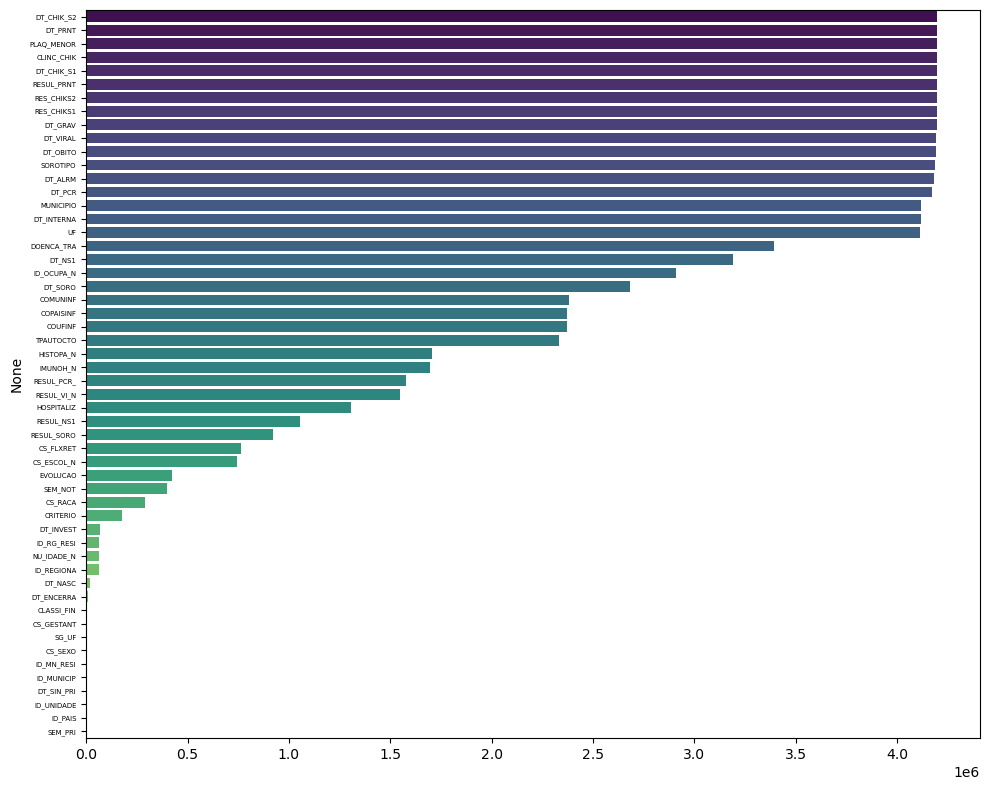

In [37]:
X_df = df.isna().sum().sort_values(ascending=False)
drop_list_df = []
for i in range(len(X_df)):
    if X_df[i] == 0:
        drop_list_df.append(X_df.index[i])

X_df.drop(labels=drop_list_df, inplace=True)

plt.figure(figsize=(10, 8))
palette = sns.color_palette("viridis", len(X_df))
ax = sns.barplot(y=X_df.index, x=X_df.values, order=X_df.index, orient='h', palette=palette)
plt.yticks(fontsize=5, rotation=0)
plt.tight_layout()
plt.show()

In [38]:
rotulos = [label.get_text() for label in ax.get_yticklabels()]
print(rotulos)

['DT_CHIK_S2', 'DT_PRNT', 'PLAQ_MENOR', 'CLINC_CHIK', 'DT_CHIK_S1', 'RESUL_PRNT', 'RES_CHIKS2', 'RES_CHIKS1', 'DT_GRAV', 'DT_VIRAL', 'DT_OBITO', 'SOROTIPO', 'DT_ALRM', 'DT_PCR', 'MUNICIPIO', 'DT_INTERNA', 'UF', 'DOENCA_TRA', 'DT_NS1', 'ID_OCUPA_N', 'DT_SORO', 'COMUNINF', 'COPAISINF', 'COUFINF', 'TPAUTOCTO', 'HISTOPA_N', 'IMUNOH_N', 'RESUL_PCR_', 'RESUL_VI_N', 'HOSPITALIZ', 'RESUL_NS1', 'RESUL_SORO', 'CS_FLXRET', 'CS_ESCOL_N', 'EVOLUCAO', 'SEM_NOT', 'CS_RACA', 'CRITERIO', 'DT_INVEST', 'ID_RG_RESI', 'NU_IDADE_N', 'ID_REGIONA', 'DT_NASC', 'DT_ENCERRA', 'CLASSI_FIN', 'CS_GESTANT', 'SG_UF', 'CS_SEXO', 'ID_MN_RESI', 'ID_MUNICIP', 'DT_SIN_PRI', 'ID_UNIDADE', 'ID_PAIS', 'SEM_PRI']


In [39]:
for coluna in df.columns:
    valores_unicos = df[coluna].value_counts()
    print(f"Valores únicos da coluna '{coluna}':")
    print(valores_unicos)
    print()

Valores únicos da coluna 'TP_NOT':
TP_NOT
2    4199367
3          4
Name: count, dtype: int64

Valores únicos da coluna 'ID_AGRAVO':
ID_AGRAVO
A90    4199371
Name: count, dtype: int64

Valores únicos da coluna 'DT_NOTIFIC':
DT_NOTIFIC
2015-03-23    16453
2015-03-16    15521
2015-03-30    14871
2015-03-24    14568
2015-03-17    14428
              ...  
2017-08-06       29
2023-08-27       28
2017-08-13       28
2022-01-02       22
2023-01-01       22
Name: count, Length: 3654, dtype: int64

Valores únicos da coluna 'SEM_NOT':
SEM_NOT
201512.0    80836
201511.0    78386
201510.0    71047
201515.0    70345
201514.0    68275
            ...  
1443.0          1
1422.0          1
1414.0          1
1420.0          1
1423.0          1
Name: count, Length: 479, dtype: int64

Valores únicos da coluna 'NU_ANO':
NU_ANO
2015    1033070
2019     719173
2016     465631
2020     397894
2014     385116
2022     351166
2021     348847
2023     337173
2017      83995
2018      76989
2013        317
Name

In [40]:
df.fillna('Sem Registro', inplace=True)

/tmp/ipykernel_181663/3056074718.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem Registro' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Sem Registro', inplace=True)


In [41]:
for coluna in df.columns:
    valores_unicos = df[coluna].unique()
    print(f"Valores únicos da coluna '{coluna}':")
    print(valores_unicos)
    print()

Valores únicos da coluna 'TP_NOT':
[2 3]

Valores únicos da coluna 'ID_AGRAVO':
['A90']

Valores únicos da coluna 'DT_NOTIFIC':
['2014-03-17' '2014-12-30' '2014-12-24' ... '2023-10-15' '2023-11-04'
 '2023-07-30']

Valores únicos da coluna 'SEM_NOT':
[201412.0 201453.0 201452.0 201420.0 201421.0 201417.0 201416.0 201415.0
 201444.0 201418.0 201414.0 201413.0 201441.0 201439.0 201431.0 201409.0
 201419.0 201427.0 201423.0 201422.0 201429.0 201425.0 201442.0 201430.0
 201438.0 201437.0 201410.0 201408.0 201428.0 201411.0 201445.0 201440.0
 201450.0 201443.0 201449.0 201405.0 201403.0 201407.0 201406.0 201448.0
 201426.0 201404.0 201402.0 1409.0 201401.0 201446.0 201434.0 201424.0
 201436.0 201435.0 201447.0 201432.0 201451.0 201433.0 1415.0 1414.0
 1418.0 1420.0 1419.0 1423.0 1422.0 1426.0 1443.0 201552.0 201513.0
 201522.0 201517.0 201510.0 201509.0 201511.0 201516.0 201519.0 201518.0
 201551.0 201508.0 201538.0 201515.0 201520.0 201514.0 201512.0 201507.0
 201523.0 201506.0 201533.0 201

In [42]:
for coluna in df.columns:
    valores_unicos = df[coluna].value_counts()
    print(f"Valores únicos da coluna '{coluna}':")
    print(valores_unicos)
    print()

Valores únicos da coluna 'TP_NOT':
TP_NOT
2    4199367
3          4
Name: count, dtype: int64

Valores únicos da coluna 'ID_AGRAVO':
ID_AGRAVO
A90    4199371
Name: count, dtype: int64

Valores únicos da coluna 'DT_NOTIFIC':
DT_NOTIFIC
2015-03-23    16453
2015-03-16    15521
2015-03-30    14871
2015-03-24    14568
2015-03-17    14428
              ...  
2017-08-06       29
2023-08-27       28
2017-08-13       28
2022-01-02       22
2023-01-01       22
Name: count, Length: 3654, dtype: int64

Valores únicos da coluna 'SEM_NOT':
SEM_NOT
Sem Registro    399919
201512.0         80836
201511.0         78386
201510.0         71047
201515.0         70345
                 ...  
1420.0               1
1422.0               1
1409.0               1
1443.0               1
1414.0               1
Name: count, Length: 480, dtype: int64

Valores únicos da coluna 'NU_ANO':
NU_ANO
2015    1033070
2019     719173
2016     465631
2020     397894
2014     385116
2022     351166
2021     348847
2023     3371

##### 3.10 Ajustes

In [43]:
renomeacao_colunas = {
    'SEM_NOT': 'Semana de notificação',
    'NU_ANO': 'Ano da notificação',
    'SG_UF_NOT': 'Sigla do estado da notificação',
    'ID_REGIONA': 'ID da regional',
    'ID_UNIDADE': 'ID da unidade',
    'DT_SIN_PRI': 'Data do sinal/sintoma principal',
    'SEM_PRI': 'Semana do sinal/sintoma principal',
    'DT_NASC': 'Data de nascimento',
    'NU_IDADE_N': 'Número da ID na notificação',
    'CS_SEXO': 'Código do sexo',
    'CS_GESTANT': 'Código de gestante',
    'CS_RACA': 'Código da raça/cor',
    'CS_ESCOL_N': 'Código de escolaridade',
    'SG_UF': 'Sigla do estado',
    'ID_RG_RESI': 'ID da região de residência',
    'ID_PAIS': 'ID do país',
    'DT_INVEST': 'Data do início da investigação',
    'ID_OCUP': 'ID da ocupação',
    'FEBRE': 'Presença de febre',
    'MIALGIA': 'Presença de mialgia',
    'CEFALEIA': 'Presença de cefaleia',
    'EXANTEMA': 'Presença de exantema',
    'VOMITO': 'Presença de vômito',
    'NAUSEA': 'Presença de náusea',
    'DOR_COSTAS': 'Presença de dor nas costas',
    'CONJUNTVIT': 'Presença de conjuntivite',
    'ARTRITE': 'Presença de artrite',
    'ARTRALGIA': 'Presença de artralgia',
    'PETEQUIA_N': 'Presença de petéquias',
    'LEUCOPENIA': 'Presença de leucopenia',
    'LACO': 'Presença de laço',
    'DOR_RETRO': 'Presença de dor retroocular',
    'DIABETES': 'Presença de diabetes',
    'HEMATOLOG': 'Presença de hematológico',
    'HEPATOPAT': 'Presença de hepatopatia',
    'RENAL': 'Presença de renal',
    'HIPERTENSA': 'Presença de hipertensão',
    'ACIDO_PEPT': 'Presença de ácido péptico',
    'AUTO_IMUNE': 'Presença de autoimunidade',
    'DT_CHIK_S1': 'Data de coleta da amostra para o exame CHIKV IgM',
    'DT_CHIK_S2': 'Data de coleta da amostra para o exame CHIKV IgG',
    'DT_PRNT': 'Data de coleta da amostra para o exame PRNT',
    'RES_CHIKS1': 'Resultado do exame CHIKV IgM',
    'RES_CHIKS2': 'Resultado do exame CHIKV IgG',
    'RESUL_PRNT': 'Resultado do exame PRNT',
    'DT_SORO': 'Data da coleta de soro',
    'RESUL_SORO': 'Resultado do exame sorológico',
    'DT_NS1': 'Data da coleta de NS1',
    'RESUL_NS1': 'Resultado do exame NS1',
    'DT_VIRAL': 'Data da coleta do exame de PCR',
    'RESUL_VI_N': 'Resultado do exame de PCR',
    'SOROTIPO': 'Sorotipo',
    'HISTOPA_N': 'Resultado do exame histopatológico',
    'IMUNOH_N': 'Resultado do exame imunohistoquímico',
    'HOSPITALIZ': 'Indicador de hospitalização',
    'DT_INTERNA': 'Data de internação',
    'UF_INFEC': 'Estado do Brasil',
    'TPAUTOCTO': 'Tipo de notificação autóctone',
    'COUFINF': 'Código de confirmação de infecção',
    'COPAISINF': 'Código de país confirmado de infecção',
    'CLASSI_FIN': 'Classificação final do caso',
    'CRITERIO': 'Critério de confirmação',
    'DOENCA_TRA': 'Doença relacionada ao trabalho',
    'CLINC_CHIK': 'Clínica de Chikungunya',
    'EVOLUCAO': 'Evolução do caso',
    'DT_OBITO': 'Data de óbito',
    'DT_ENCERRA': 'Data de encerramento',
    'ALRM_HIPOT': 'Alarme de hipotensão',
    'ALRM_PLAQ': 'Alarme de plaquetas',
    'ALRM_VOM': 'Alarme de vômito',
    'ALRM_SANG': 'Alarme de sangramento',
    'ALRM_HEMAT': 'Alarme de hematoma',
    'GRAV_MIOC': 'Gravidade de miocárdio',
    'GRAV_CONSC': 'Gravidade de nível de consciência',
    'GRAV_ORGAO': 'Gravidade de órgão',
    'DT_GRAV': 'Data da Gravidade',
    'MANI_HEMOR': 'Manifestação de hemorragia',
    'EPISTAXE': 'Manifestação de epistaxe',
    'GENGIVO': 'Manifestação na gengiva',
    'METRO': 'Manifestação de metrorragia',
    'PETEQUIAS': 'Manifestação de petéquias',
    'HEMATURA': 'Manifestação de hematúria',
    'SANGRAM': 'Manifestação de sangramento',
    'PLASMATICO': 'Relacionado ao plasma',
    'EVIDENCIA': 'Evidência médica',
    'PLAQ_MENOR': 'Menor contagem de plaquetas',
    'CON_FHD': 'Hipertensão Familiar',
    'COMPLICA': 'Presença de complicações',
    'TP_SISTEMA': 'Tipo de sistema',
    'NDUPLIC_N': 'Reincidência do quadro',
    'CS_FLXRET': 'Fluxo de retorno',
    'FLXRECEBI': 'Fluxo de retorno recebido',
}

In [44]:
df = df.drop(['LACO_N','DT_PCR','RESUL_PCR_'],axis=1)

In [45]:
df = df.rename(columns=renomeacao_colunas)

In [46]:
df.shape

(4199371, 116)

In [47]:
# for coluna in df.columns:
#     valores_unicos = df[coluna].value_counts()
#     print(f"Valores únicos da coluna '{coluna}':")
#     print(valores_unicos)
#     print()

##### 3.11 Seleção de Colunas

In [48]:
col_select = ['DT_NOTIFIC','Ano da notificação','Código do sexo','Código da raça/cor','Código de escolaridade',
              'Presença de febre','Presença de mialgia','Presença de cefaleia','Presença de exantema','Presença de vômito',
              'Presença de náusea','Presença de dor nas costas','Presença de conjuntivite','Presença de artrite','Presença de artralgia',
              'Presença de petéquias','Presença de leucopenia','Presença de laço','Presença de dor retroocular','Presença de diabetes',
              'Presença de hematológico','Presença de hepatopatia','Presença de renal','Presença de hipertensão',
              'Presença de ácido péptico','Presença de autoimunidade','Resultado do exame sorológico','Resultado do exame de PCR',
              'Indicador de hospitalização','Classificação final do caso','Critério de confirmação','Evolução do caso','ID_MUNICIP',
              'Alarme de hipotensão','Alarme de plaquetas','Alarme de vômito','Alarme de sangramento','Alarme de hematoma',
              'ALRM_ABDOM','ALRM_LETAR','ALRM_HEPAT','ALRM_LIQ','GRAV_PULSO','GRAV_CONV','GRAV_ENCH','GRAV_INSUF',
              'GRAV_TAQUI','GRAV_EXTRE','GRAV_HIPOT','GRAV_HEMAT','GRAV_MELEN','GRAV_METRO','GRAV_SANG','GRAV_AST','Gravidade de miocárdio',
              'Gravidade de nível de consciência','Gravidade de órgão','Manifestação de hemorragia','Manifestação de epistaxe',
              'Manifestação na gengiva','Manifestação de metrorragia', 'Manifestação de petéquias','Manifestação de hematúria','Manifestação de sangramento'
             ]

In [49]:
df_new = df[col_select]

In [50]:
df_new.head(5)

,DT_NOTIFIC,Ano da notificação,Código do sexo,Código da raça/cor,Código de escolaridade,Presença de febre,Presença de mialgia,Presença de cefaleia,Presença de exantema,Presença de vômito,...,Gravidade de miocárdio,Gravidade de nível de consciência,Gravidade de órgão,Manifestação de hemorragia,Manifestação de epistaxe,Manifestação na gengiva,Manifestação de metrorragia,Manifestação de petéquias,Manifestação de hematúria,Manifestação de sangramento
0,2014-03-17,2014,Masculino,Preta,Ignorado,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro
1,2014-12-30,2014,Feminino,Branca,Não se aplica,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro
2,2014-12-24,2014,Masculino,Branca,Ignorado,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro
3,2014-05-12,2014,Feminino,Branca,Ensino médio completo (antigo colegial ou 2° g...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro
4,2014-05-23,2014,Masculino,Sem Registro,Ignorado,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro


In [51]:
##### 3.12 Inclusão Cidade

In [52]:
link   = '../dados/municipios_sp_edited.csv'
df_muni_sp = pd.read_csv(link,sep=",")
df_muni_sp = df_muni_sp.drop(['ID_ESTADO','ESTADO'],axis=1)
df_muni_sp = df_muni_sp.rename(columns={"ID_MUNICIPIO": "ID_MUNICIP"})
df_muni_sp.head(5)

,REGIAO,MUNICIPIO,ID_MUNICIP
0,Presidente Prudente,Adamantina,350010
1,São José do Rio Preto,Adolfo,350020
2,Campinas,Aguaí,350030
3,Campinas,Águas da Prata,350040
4,Campinas,Águas de Lindóia,350050


In [53]:
df_muni_sp[df_muni_sp['MUNICIPIO']=='São Paulo']

,REGIAO,MUNICIPIO,ID_MUNICIP
564,São Paulo,São Paulo,355030


In [54]:
df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].str.replace('.0', '')
df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].str.replace('Sem Registro', '')
df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].str.replace('.', '')
df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].str.replace('.', '')
df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].str.replace('.', '')
df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].replace('9', '355030')
df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].replace('35', '355030')
df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].replace('', '355030')

/tmp/ipykernel_181663/2658682852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].str.replace('.0', '')
/tmp/ipykernel_181663/2658682852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].str.replace('Sem Registro', '')
/tmp/ipykernel_181663/2658682852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [55]:
df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].astype('int64')

/tmp/ipykernel_181663/3998802754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ID_MUNICIP'] = df_new['ID_MUNICIP'].astype('int64')


In [56]:
df_new = df_new.merge(df_muni_sp,on=['ID_MUNICIP'])
df_new = df_new.rename(columns={"MUNICIPIO_y": "MUNICIPIO_NAME"})

In [57]:
col_select1 = ['MUNICIPIO','REGIAO','DT_NOTIFIC','Ano da notificação','Código do sexo',
               'Código da raça/cor','Código de escolaridade',
               'Resultado do exame sorológico','Resultado do exame de PCR',
               'Indicador de hospitalização','Critério de confirmação','Evolução do caso',
               'Presença de febre','Presença de mialgia','Presença de cefaleia','Presença de exantema',
               'Presença de vômito','Presença de náusea','Presença de dor nas costas',
               'Presença de conjuntivite','Presença de artrite','Presença de artralgia',
               'Presença de petéquias','Presença de leucopenia','Presença de laço',
               'Presença de dor retroocular','Presença de diabetes',
               'Presença de hematológico','Presença de hepatopatia','Presença de renal',
               'Presença de hipertensão','Presença de ácido péptico','Presença de autoimunidade',
               'Alarme de hipotensão','Alarme de plaquetas','Alarme de vômito',
               'Alarme de sangramento','Alarme de hematoma',
               'ALRM_ABDOM','ALRM_LETAR','ALRM_HEPAT','ALRM_LIQ',
               'GRAV_PULSO','GRAV_CONV','GRAV_ENCH','GRAV_INSUF','GRAV_TAQUI','GRAV_EXTRE','GRAV_HIPOT',
               'GRAV_HEMAT','GRAV_MELEN','GRAV_METRO','GRAV_SANG','GRAV_AST',
               'Gravidade de miocárdio','Gravidade de nível de consciência','Gravidade de órgão',
               'Manifestação de hemorragia','Manifestação de epistaxe','Manifestação na gengiva',
               'Manifestação de metrorragia', 'Manifestação de petéquias',
               'Manifestação de hematúria','Manifestação de sangramento',
               'Classificação final do caso'
             ]

In [58]:
df_new1 = df_new[col_select1]
df_new1.head(5)

,MUNICIPIO,REGIAO,DT_NOTIFIC,Ano da notificação,Código do sexo,Código da raça/cor,Código de escolaridade,Resultado do exame sorológico,Resultado do exame de PCR,Indicador de hospitalização,...,Gravidade de nível de consciência,Gravidade de órgão,Manifestação de hemorragia,Manifestação de epistaxe,Manifestação na gengiva,Manifestação de metrorragia,Manifestação de petéquias,Manifestação de hematúria,Manifestação de sangramento,Classificação final do caso
0,Mairiporã,São Paulo,2014-03-17,2014,Masculino,Preta,Ignorado,Sem Registro,Não realizado,Não hospitalizado,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,10.0
1,Sorocaba,Sorocaba,2014-12-30,2014,Feminino,Branca,Não se aplica,Sem Registro,Sem Registro,Sem Registro,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,5.0
2,Cruzeiro,São José dos Campos,2014-12-24,2014,Masculino,Branca,Ignorado,Negativo,Sem Registro,Sem Registro,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,5.0
3,Campinas,Campinas,2014-05-12,2014,Feminino,Branca,Ensino médio completo (antigo colegial ou 2° g...,Sem Registro,Não realizado,Sem Registro,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,10.0
4,São Paulo,São Paulo,2014-05-23,2014,Masculino,Sem Registro,Ignorado,Sem Registro,Não realizado,Não hospitalizado,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,5.0


In [59]:
colum_name = 'Evolução do caso'

new_map = {
    'Em investigação': 'ignorado',
}
df_new1[colum_name] = df_new1[colum_name].replace(new_map)
print("Categorias únicas na coluna:", df_new1[colum_name].unique())

Categorias únicas na coluna: ['cura' 'ignorado' 'Sem Registro' 'óbito por outras causas'
 'óbito pelo agravo' 'óbito em investigação']


/tmp/ipykernel_181663/46806379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1[colum_name] = df_new1[colum_name].replace(new_map)


In [60]:
colum_name = 'Critério de confirmação'

new_map = {
    'óbito em investigação': 'Sem Registro',
}
df_new1[colum_name] = df_new1[colum_name].replace(new_map)
print("Categorias únicas na coluna:", df_new1[colum_name].unique())

Categorias únicas na coluna: ['Laboratório' 'Clínico' 'Sem Registro' 'Em investigação']


/tmp/ipykernel_181663/4218057779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1[colum_name] = df_new1[colum_name].replace(new_map)


In [61]:
colum_name = 'Classificação final do caso'

new_map = {
    10.0: 'Dengue',
    11.0: 'Dengue',
    12.0: 'Dengue',
    5.0: 'Não-Dengue',
    8.0: 'Não-Dengue',
    1.0: 'Não-Dengue',
    2.0: 'Não-Dengue',
    3.0: 'Não-Dengue',
    4.0: 'Não-Dengue',
}
df_new1[colum_name] = df_new1[colum_name].replace(new_map)
print("Categorias únicas na coluna:", df_new1[colum_name].unique())

Categorias únicas na coluna: ['Dengue' 'Não-Dengue' 'Sem Registro']


/tmp/ipykernel_181663/3920939409.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1[colum_name] = df_new1[colum_name].replace(new_map)


In [62]:
for coluna in df_new1.columns:
    valores_unicos = df_new1[coluna].value_counts()
    print(f"Valores únicos da coluna '{coluna}':")
    print(valores_unicos)
    print()

Valores únicos da coluna 'MUNICIPIO':
MUNICIPIO
São Paulo                 368609
Campinas                  217185
São José do Rio Preto     211111
Ribeirão Preto            157315
Sorocaba                  133953
                           ...  
Monteiro Lobato               10
Ribeira                        9
Bom Sucesso de Itararé         6
Itaoca                         4
Barra do Chapéu                4
Name: count, Length: 645, dtype: int64

Valores únicos da coluna 'REGIAO':
REGIAO
Campinas                 833785
São Paulo                750570
São José do Rio Preto    502259
Ribeirão Preto           391772
São José dos Campos      354479
Sorocaba                 291958
Presidente Prudente      279599
Marília                  213416
Araçatuba                206638
Araraquara               206509
Bauru                    168303
Name: count, dtype: int64

Valores únicos da coluna 'DT_NOTIFIC':
DT_NOTIFIC
2015-03-23    16453
2015-03-16    15521
2015-03-30    14871
2015-03-24    1456

In [63]:
df_new1['MUNICIPIO'] = df_new1['MUNICIPIO'].astype('category')
df_new1['REGIAO']    = df_new1['REGIAO'].astype('category')

/tmp/ipykernel_181663/2122678479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['MUNICIPIO'] = df_new1['MUNICIPIO'].astype('category')
/tmp/ipykernel_181663/2122678479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['REGIAO']    = df_new1['REGIAO'].astype('category')


In [64]:
df_new1['DT_NOTIFIC'] = pd.to_datetime(df_new1['DT_NOTIFIC'])
df_new1['Ano da notificação'] = df_new1['Ano da notificação'].astype('category')

/tmp/ipykernel_181663/327629867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['DT_NOTIFIC'] = pd.to_datetime(df_new1['DT_NOTIFIC'])
/tmp/ipykernel_181663/327629867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['Ano da notificação'] = df_new1['Ano da notificação'].astype('category')


In [65]:
for i in range(4,len(df_new1.columns)):

    col_name = df_new1.columns[i]
    
    df_new1[col_name] = df_new1[col_name].astype('category')

/tmp/ipykernel_181663/2973195807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1[col_name] = df_new1[col_name].astype('category')
/tmp/ipykernel_181663/2973195807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1[col_name] = df_new1[col_name].astype('category')
/tmp/ipykernel_181663/2973195807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [66]:
# df_new1.dtypes

In [67]:
# for colum in df_new1.columns:

#     print(colum)

In [68]:
# for coluna in df_new1.columns:
#     valores_unicos = df_new1[coluna].value_counts()
#     print(f"Valores únicos da coluna '{coluna}':")
#     print(valores_unicos)
#     print()

##### 3.14 Trabalhando o Data Set - Classificação

In [69]:
mask = df_new1['Classificação final do caso'] != 'Sem Registro'

In [70]:
df_new2 = df_new1[mask]
df_new2.shape

(4196655, 65)

In [71]:
df_new1.shape[0] - df_new2.shape[0]

2633

In [72]:
df_new2['Classificação final do caso'] = df_new2['Classificação final do caso'].astype('object')
df_new2['Classificação final do caso'] = df_new2['Classificação final do caso'].astype('category')

/tmp/ipykernel_181663/919573960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['Classificação final do caso'] = df_new2['Classificação final do caso'].astype('object')
/tmp/ipykernel_181663/919573960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['Classificação final do caso'] = df_new2['Classificação final do caso'].astype('category')


In [73]:
colum_name = 'Classificação final do caso'

new_map = {
    'Não-Dengue': 0,
    'Dengue': 1,
}
df_new2[colum_name] = df_new2[colum_name].replace(new_map)
print("Categorias únicas na coluna:", df_new2[colum_name].unique())

Categorias únicas na coluna: [1, 0]
Categories (2, int64): [1, 0]


/tmp/ipykernel_181663/2785994527.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new2[colum_name] = df_new2[colum_name].replace(new_map)
/tmp/ipykernel_181663/2785994527.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_new2[colum_name] = df_new2[colum_name].replace(new_map)
/tmp/ipykernel_181663/2785994527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [74]:
df_new2.head(5)

,MUNICIPIO,REGIAO,DT_NOTIFIC,Ano da notificação,Código do sexo,Código da raça/cor,Código de escolaridade,Resultado do exame sorológico,Resultado do exame de PCR,Indicador de hospitalização,...,Gravidade de nível de consciência,Gravidade de órgão,Manifestação de hemorragia,Manifestação de epistaxe,Manifestação na gengiva,Manifestação de metrorragia,Manifestação de petéquias,Manifestação de hematúria,Manifestação de sangramento,Classificação final do caso
0,Mairiporã,São Paulo,2014-03-17,2014,Masculino,Preta,Ignorado,Sem Registro,Não realizado,Não hospitalizado,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,1
1,Sorocaba,Sorocaba,2014-12-30,2014,Feminino,Branca,Não se aplica,Sem Registro,Sem Registro,Sem Registro,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,0
2,Cruzeiro,São José dos Campos,2014-12-24,2014,Masculino,Branca,Ignorado,Negativo,Sem Registro,Sem Registro,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,0
3,Campinas,Campinas,2014-05-12,2014,Feminino,Branca,Ensino médio completo (antigo colegial ou 2° g...,Sem Registro,Não realizado,Sem Registro,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,1
4,São Paulo,São Paulo,2014-05-23,2014,Masculino,Sem Registro,Ignorado,Sem Registro,Não realizado,Não hospitalizado,...,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,Sem Registro,0


In [75]:
df_class = pd.get_dummies(data=df_new2.drop(['MUNICIPIO','REGIAO','DT_NOTIFIC','Ano da notificação','Classificação final do caso'],axis=1))
df_class['Classificação final do caso'] = df_new2['Classificação final do caso']
df_class.head(5)

,Código do sexo_Feminino,Código do sexo_Masculino,Código do sexo_Sem Registro,Código da raça/cor_Amarela,Código da raça/cor_Branca,Código da raça/cor_Indígena,Código da raça/cor_Parda,Código da raça/cor_Preta,Código da raça/cor_Sem Registro,Código de escolaridade_1ª a 4ª série incompleta do EF,...,Manifestação de petéquias_Sim,Manifestação de hematúria_Não,Manifestação de hematúria_Não Realizado,Manifestação de hematúria_Sem Registro,Manifestação de hematúria_Sim,Manifestação de sangramento_Não,Manifestação de sangramento_Não Realizado,Manifestação de sangramento_Sem Registro,Manifestação de sangramento_Sim,Classificação final do caso
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,1
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,0
2,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,0
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,1
4,False,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,0


##### 3.15 Trabalhando o Data Set - Séries Temporais

In [76]:
df_ts = df_new2[['MUNICIPIO','REGIAO','DT_NOTIFIC','Ano da notificação','Classificação final do caso']]

In [77]:
df_ts.head(5)

,MUNICIPIO,REGIAO,DT_NOTIFIC,Ano da notificação,Classificação final do caso
0,Mairiporã,São Paulo,2014-03-17,2014,1
1,Sorocaba,Sorocaba,2014-12-30,2014,0
2,Cruzeiro,São José dos Campos,2014-12-24,2014,0
3,Campinas,Campinas,2014-05-12,2014,1
4,São Paulo,São Paulo,2014-05-23,2014,0


In [78]:
mask = df_ts['Classificação final do caso'] == 1
df_ts = df_ts[mask]
df_ts.head(5)

,MUNICIPIO,REGIAO,DT_NOTIFIC,Ano da notificação,Classificação final do caso
0,Mairiporã,São Paulo,2014-03-17,2014,1
3,Campinas,Campinas,2014-05-12,2014,1
5,São Paulo,São Paulo,2014-04-21,2014,1
6,São Paulo,São Paulo,2014-04-23,2014,1
7,Campinas,Campinas,2014-05-14,2014,1


##### 3.16 Salvando Data Frame

In [79]:
link   = '../dados/dados_select_full.csv'
df_new1.to_csv(link, index=False)

In [80]:
link   = '../dados/dados_select_dengue.csv'
df_new2.to_csv(link, index=False)

In [81]:
link   = '../dados/dados_class.csv'
df_class.to_csv(link, index=False)

In [82]:
link   = '../dados/dados_ts.csv'
df_ts.to_csv(link, index=False)